<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Convolutional Neural Networks And Computer Vision with TensorFlow

In the prievious notebook we've covered the basics of TensorFlow and built some models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, **Convolutional neural networks (CNNs)** can be used for computer vision (detecting patterns in visual data).

> **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
- Classify whether a picture of food contains pizza 🍕 or steak 🥩
- Detect whether or not an object appears in an image.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example
- Steps in modelling for binary image classification with CNNs
    - Becoming one with the data
    - Preparing data for modelling
    - Creating a CNN model
    - Fitting a model
    - Evaluating a model
    - Improving a model
    - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
    - Same as above (but this time with a different dataset)

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. Whate you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input images(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size,image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.Keras.layers.ConvXD` (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`tf.keras.activations.relu`) |
| Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully connected layer | Further refines learned features from convolutional layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi) |
| Output activation | Adds non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` |

Example stack together : 

<center><img src = "images/03-simple-convnet.png" width = 800px></center>

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.


We'll download the `pizza_steak` subset .zip file and unzip it.

In [1]:
# Install wget
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0334ff2cd7a61a868e70942074b334a5273094855745d05909a3f1bdd4997776
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import zipfile
import wget

# Download zip file of pizza_steak images
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
wget.download(url)

'pizza_steak.zip'

In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
- A **train** directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.

- A **test** directory with the same structure as the **train** directory.

Let's inspect each of the directories we've downloaded.

To do so, we can use the command `ls` which stands for list.

In [4]:
ls "pizza_steak"

test/  train/


We can see we've got a train and test folder

In [5]:
ls "pizza_steak/train"

pizza/  steak/


In [6]:
ls "pizza_steak/train/steak"

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg   443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  169

We have a whole bunch of images. It seems we have 750 images.

In [7]:
import os

# Walk through pizza_steak directory and list  number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a  a longer list of classes)
import pathlib
data_dir = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = [item.name for item in data_dir.glob("*")]
class_names

['steak', 'pizza']

> **Note:** Whenever you're working with data, it's always good to visualize it as much as possible.

Let's visualize our images

In [10]:
# Visualize the images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimp
import random

def view_random_image(target_dir,target_class):
    """
    Visualize a random picture of a selected class from a target directory 
    
    Inputs:
    - target_dir : path of the target directory
    - target_class : name of the target class

    Return:
    - img : image
    """

    # setup the targert directory 
    target_folder = f'{target_dir}/{target_class}'

    # get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    # Reag in the image and plot it using matplotlib
    img = mpimp.imread(f'{target_folder}/{random_image[0]}')
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # show the shape of the image
    print(f"Image shape: {img.shape}")

    return img


Image shape: (512, 289, 3)


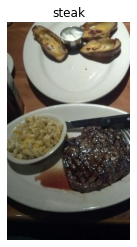

In [11]:
# view a random image from the training set
img = view_random_image(target_dir="pizza_steak/train",target_class="steak")

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


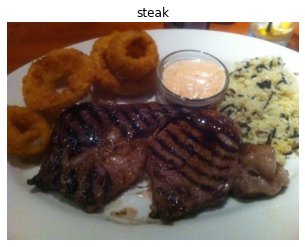

In [12]:
# let's plot different images of the steak class
for i in range(4):
    view_random_image(target_dir="pizza_steak/train",target_class="steak")

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


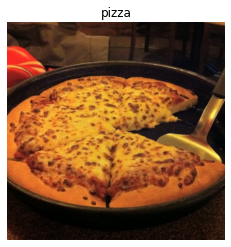

In [13]:
# let's plot different images of the pizza class
for i in range(4):
    view_random_image(target_dir="pizza_steak/train",target_class="pizza")

In [14]:
# view the img
img

array([[[ 57,  54,  37],
        [ 60,  57,  42],
        [ 66,  60,  48],
        ...,
        [142,  92,  65],
        [142,  92,  65],
        [137,  94,  62]],

       [[ 54,  51,  36],
        [ 57,  54,  39],
        [ 62,  58,  46],
        ...,
        [149,  99,  72],
        [149,  99,  72],
        [146, 103,  71]],

       [[ 51,  47,  35],
        [ 53,  49,  37],
        [ 58,  54,  43],
        ...,
        [161, 112,  82],
        [161, 112,  82],
        [158, 115,  83]],

       ...,

       [[  7,  12,  15],
        [  7,  12,  15],
        [  7,  12,  15],
        ...,
        [  4,   3,   8],
        [  4,   3,   8],
        [  4,   3,   8]],

       [[  6,  11,  14],
        [  6,  11,  14],
        [  7,  12,  15],
        ...,
        [  4,   3,   8],
        [  4,   3,   8],
        [  4,   3,   8]],

       [[ 11,  16,  19],
        [ 11,  16,  19],
        [ 11,  16,  19],
        ...,
        [  4,   3,   8],
        [  4,   3,   8],
        [  4,   3,   8]]

In [15]:
# shape of img
img.shape

(512, 289, 3)

As we can see img is a big tensor. The computer sees the images in the form of an array.

Looking at the image shape more closely, we can se it's in the form `(width, height, colour channels)`. In our case the width and height are vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of **red, green and blue (RGB) pixels**.

You'll notice all of the values in the `img` are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we built a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [16]:
# Get all the pixel values between 0 and 1
max_pixel_value = img.max()
print(max_pixel_value)

img/max_pixel_value

255


array([[[0.22352941, 0.21176471, 0.14509804],
        [0.23529412, 0.22352941, 0.16470588],
        [0.25882353, 0.23529412, 0.18823529],
        ...,
        [0.55686275, 0.36078431, 0.25490196],
        [0.55686275, 0.36078431, 0.25490196],
        [0.5372549 , 0.36862745, 0.24313725]],

       [[0.21176471, 0.2       , 0.14117647],
        [0.22352941, 0.21176471, 0.15294118],
        [0.24313725, 0.22745098, 0.18039216],
        ...,
        [0.58431373, 0.38823529, 0.28235294],
        [0.58431373, 0.38823529, 0.28235294],
        [0.57254902, 0.40392157, 0.27843137]],

       [[0.2       , 0.18431373, 0.1372549 ],
        [0.20784314, 0.19215686, 0.14509804],
        [0.22745098, 0.21176471, 0.16862745],
        ...,
        [0.63137255, 0.43921569, 0.32156863],
        [0.63137255, 0.43921569, 0.32156863],
        [0.61960784, 0.45098039, 0.3254902 ]],

       ...,

       [[0.02745098, 0.04705882, 0.05882353],
        [0.02745098, 0.04705882, 0.05882353],
        [0.02745098, 0

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a **Random Forest machine learning model** and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> **Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some king of modelling paper with a published result and try to beat it.

The code in the following cell replicates an end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

> **Resource:** The architecture we're using below is a scaled-down version of **VGG-16**, a convolutional neural network which came 2nd in the 2014 **ImageNet classification competition**

In [17]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# set seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), # batches
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 225ms/step - loss: 0.5744 - accuracy: 0.7000 - val_loss: 0.3740 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4293 - accuracy: 0.8173 - val_loss: 0.4090 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3851 - accuracy: 0.8380 - val_loss: 0.3208 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3482 - accuracy: 0.8533 - val_loss: 0.3126 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3211 - accuracy: 0.8713 - val_loss: 0.2955 - val_accuracy: 0.8720


> **Note :** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all the above cells as changing the runtime type causes Colab to have to reset.

After 5 epochs our model got ~88% accuracy on the training set and ~85% and the test set.

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food 101 dataset, so we can't directly compare these metrics to the baseline.

In [19]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

We have replicated the architecture of the CNN Explainer website or Tiny VGG architecture model.

Now there are a few new things here we haven't discussed, namely:
- The `ImageDataGenerator` class and the `rescale` parameter
- The `flow_from_directory()` method
  - The `batch_size` parameter
  - the `target_size` parameter
- `Conv2D` layers
- `MaxPool2D` layers
- The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all the same parameters in our previous model except for changing two things:
- **The data** - we're now working with images instead of dots.
- **The input shape** - we have to tell our neural network the shape of the images we're working with.
  - A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224,224,3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [20]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_2 = model_2.fit(train_data, epochs = 5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 1.1459 - accuracy: 0.5187 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [21]:
# Check out the model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> **Note :** You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher numbezr of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.


Since our model didn't work, let's try to improve it by increasing the number of neurons in each dense layer from 4 to 100 and add an extra layer.

> **Note :** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [22]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 3.1843 - accuracy: 0.5847 - val_loss: 0.5697 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6036 - accuracy: 0.7293 - val_loss: 1.1088 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.7291 - accuracy: 0.6880 - val_loss: 0.5355 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.7273 - accuracy: 0.7067 - val_loss: 0.6662 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6336 - accuracy: 0.7420 - val_loss: 0.5314 - val_accuracy: 0.7240


In [23]:
# summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification : Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model
7. Repeat until satisfied

### 1. Import and become one with the data

Whatever the kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You can also notice if some of your data is messed up and start to consider ways you might go about fixing it.

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


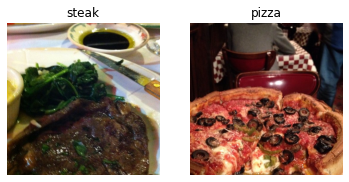

In [24]:
# Visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 3. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into a training set and a test set. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
- 10,000 imahges (or more) might not fit into the memory of your processor (GPU)
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

To turn our data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets.

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model. 

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing. Remember from before how we imported an image and it's pixel values were between 0 and 255? 

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and thei pixel values being normalized.

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Looks like our training set has 1500 images belonging to 2 classes (pizza and steak) and our test set has 500 images also belonging to 2 classes.

Some things here:
- Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
- The `target_size` parameter defines the input size of our images in `(height,width)` format.
- The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
- The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [28]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels of train_data

images.shape, labels

((32, 224, 224, 3),
 array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32))

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
# Get the first two images
images[:2]

array([[[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],

        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],

        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],

        ...,

        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352943]

In [31]:
# shape of an image
images[0].shape

(224, 224, 3)

In [32]:
# View the labels of the batches
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either 0 (pizza) or 1 (steak)

### 3. Create a model

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing the best on **ImageNet** (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> **Note :** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model 
model_4 = Sequential([
      Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu",input_shape=(224,224,3)), # input layer
      Conv2D(10,3,activation="relu"),
      Conv2D(10,3,activation="relu"),
      Flatten(),
      Dense(1,activation="sigmoid") # output layer
])

We've got a simple convolutional neural network architecture ready to go. And it follows the typical CNN structure of:

Input -> Conv + ReLU layers -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the `Conv2D` layer:

- The `2D` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel individually.

| Hyperparameter name | What does it do? | Typical Values |
| ----- | ----- | ----- |
| `Filters` | Decides how many filters should pass over an input tensor | 10, 32, 64, 128 |
| `Kernel size (filter size)` | The size of our filters, for example, a kernel_sze of (3,3) will mean each filter will have the size of 3x3, meaning it will look at a space of 3x3 pixels each time. | 3, 5, 7 |
| `stride` | The number of pixels a filter will move accross as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time | 1, 2, 3 ...  |
| `padding` | `'same`' adds zeros to the outside of the image so the resulting output of the convolutional layers is the same as the input, where `'valid'` cuts off excess pixels where the filter doesn't fit | 'same' or 'valid' |

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza.

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit the model

In [36]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 238ms/step - loss: 1.1413 - accuracy: 0.7167 - val_loss: 0.4329 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3817 - accuracy: 0.8440 - val_loss: 0.3774 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2584 - accuracy: 0.9033 - val_loss: 0.4370 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.1078 - accuracy: 0.9713 - val_loss: 0.4146 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.0568 - accuracy: 0.9853 - val_loss: 0.5629 - val_accuracy: 0.7860


- `steps_per_epoch` : this is the number of batches a model will go through per epoch, in our case, we want ourr model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 -> 1500/32 =~ 47 steps)
- `validation_steps` : same as above, except for the `validation_data` parameter (500 test images in batches of 32 -> 500/32 =~ 16 steps). 

### 5. Evaluate the model

It looks like our model is learning something. Let's check out its training curves.

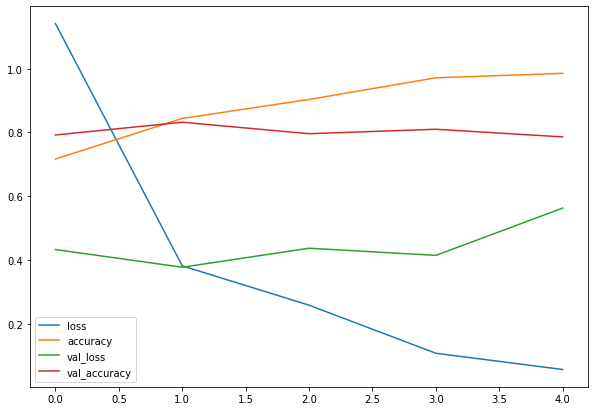

In [40]:
# plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [71]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  Input:
  - history : history of the fitted model
  """

  # loss 
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # accuracy
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # epochs
  epochs = range(len(history.history["loss"]))

  # figure, axes
  fig, axs = plt.subplots(1,2,figsize=(15,7))

  # Plot loss
  axs[0].plot(epochs, loss, label="training_loss")
  axs[0].plot(epochs, val_loss, label="val_loss")
  axs[0].set_xlabel('epochs')
  axs[0].legend()

  # Plot Accuracy
  axs[1].plot(epochs,  accuracy, label="training_accuracy")
  axs[1].plot(epochs, val_accuracy, label="val_accuracy")
  axs[1].set_xlabel('epochs')
  axs[1].legend()

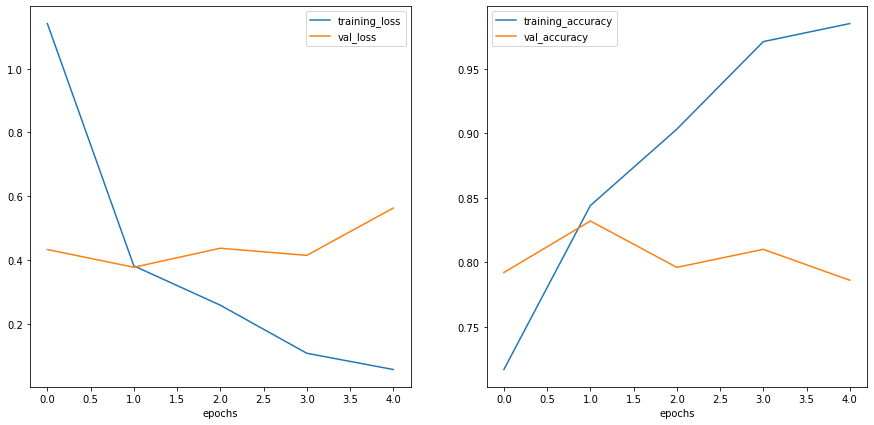

In [73]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

It looks like our model is **overfitting** the training dataset.

> **Note :** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

So far we've gone through steps 1 and 2.

And there are even a few more things we could try to further overfit our model:
- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 3.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
- A ConvNet with **max pooling**
- A ConvNet with max pooling and data augmentation.